In [5]:
from env import user, password,host
import pandas as pd
import numpy as np
import datetime
from pydataset import data


In [30]:
def get_db_url(user,password,host,db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [50]:
url =  get_db_url(user,password,host, 'chipotle')
orders_df = pd.read_sql('select * from orders', url)

In [46]:
orders_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [51]:
orders_df['item_price'] = orders_df.item_price.str.replace('$','').astype('float')

In [57]:
orders_df.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [64]:
orders_df.groupby('item_name').quantity.sum().sort_values(ascending = False).head(3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [65]:
orders_df.groupby('item_name').item_price.sum().sort_values(ascending = False).head(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [10]:
url =  get_db_url(user,password,host, 'employees')
titles_df = pd.read_sql('select * from titles', url)
employees_df = pd.read_sql('select * from employees', url)


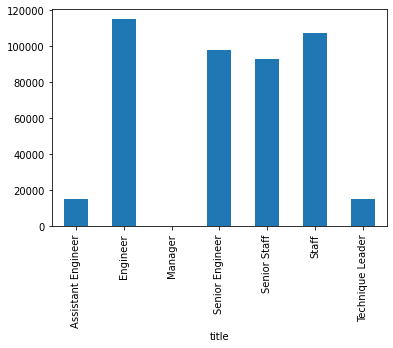

In [12]:
d = titles_df.groupby('title').emp_no.count().plot.bar('Title of Employees')

In [15]:
#6
employees_df = employees_df.merge(titles_df, on='emp_no',indicator = True)

<AxesSubplot:title={'center':'Titles held during employment'}>

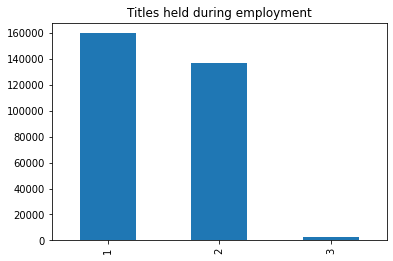

In [18]:
#7.
employees_df.groupby('emp_no').title.count().value_counts().plot.bar(title = 'Titles held during employment')

In [20]:
#8
employees_df.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [28]:
#9
title_department = ''' SELECT t.emp_no, 
                    t.title, 
                    t.from_date, 
                    t.to_date, 
                    d.dept_name 
                    FROM departments AS d 
                    JOIN dept_emp AS de USING(dept_no) 
                    JOIN titles AS t USING(emp_no) '''


In [39]:
url = get_db_url(user,password,host, 'employees')
titles_dept_df = pd.read_sql('SELECT t.emp_no, t.title,  t.from_date, t.to_date,   d.dept_name FROM departments AS d JOIN dept_emp AS de USING(dept_no) JOIN titles AS t USING(emp_no)',url)
titles_dept_df

,emp_no,title,from_date,to_date,dept_name
0,10011,Staff,1990-01-22,1996-11-09,Customer Service
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service
2,10038,Staff,1989-09-20,1996-09-20,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,Customer Service
4,10049,Staff,1992-05-04,2000-05-04,Customer Service
...,...,...,...,...,...
489898,499986,Senior Staff,1992-08-11,9999-01-01,Sales
489899,499986,Staff,1985-08-11,1992-08-11,Sales
489900,499987,Staff,1999-12-21,9999-01-01,Sales
489901,499988,Senior Staff,1997-07-25,2001-10-09,Sales


In [40]:
pd.crosstab(titles_dept_df.dept_name, titles_dept_df.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0
